In [1]:
import torch
import torch.nn as nn
import numpy as np
from scipy.ndimage import gaussian_filter, binary_closing
import noise
import matplotlib.pyplot as plt

def generate_vessel_mask(shape=(64, 64, 64), scale=10, threshold=0.2, smoothing=2, octave=4):
    # Create an empty array
    mask = np.zeros(shape)

    _x = np.random.randint(0, 3000)
    _y = np.random.randint(0, 3000)
    _z = np.random.randint(0, 3000)

    # Fill the array with Perlin noise
    for x in range(shape[0]):
        for y in range(shape[1]):
            for z in range(shape[2]):
                # mask[x, y, z] = ngeneraor.noise3(x/scale, y/scale, z/scale)
                mask[x, y, z] = noise.pnoise3(_x + x/scale, _y + y/scale, _z + z/scale, octaves=4)

    # Threshold the noise to create a binary mask
    mask = mask > threshold

    # Apply a Gaussian filter to smooth the mask
    mask = gaussian_filter(mask.astype(float), sigma=smoothing)

    # Apply a closing operation to connect nearby regions
    mask = binary_closing(mask > threshold, structure=np.ones((3, 3, 3)))

    return mask

def mask_plots(slice: torch.Tensor, masks: list[torch.Tensor], pmasks: list[torch.Tensor]):
    fig, axes = plt.subplots(3, len(masks), figsize=(20, 10))
    
    for i, (mask, pmask) in enumerate(zip(masks, pmasks)):
        axes[0][i].axis('off')
        axes[0][i].imshow(slice[0, 0, slice.shape[2] // 2], cmap='gray')
        axes[1][i].axis('off')
        axes[1][i].imshow(mask[0, 0, mask.shape[2] // 2], cmap='gray')
        axes[2][i].axis('off')
        axes[2][i].imshow(pmask[0, 0, pmask.shape[2] // 2], cmap='gray')
    
    plt.show()


layers = [64, 128, 256, 512, 1024]

mask_blocks = nn.ModuleList([
    nn.AvgPool3d(2 ** (i + 1))
    for i in reversed(range(len(layers) - 1))
])

def deep_masks(y: torch.Tensor):
    masks = []
    for i in range(len(mask_blocks)):
        masks.append(mask_blocks[i](y))
    return masks + [y]

mask_blocks
y = torch.randn(1, 1, 64, 64, 64)
masks = deep_masks(y)
[m.shape for m in masks]

[torch.Size([1, 1, 4, 4, 4]),
 torch.Size([1, 1, 8, 8, 8]),
 torch.Size([1, 1, 16, 16, 16]),
 torch.Size([1, 1, 32, 32, 32]),
 torch.Size([1, 1, 64, 64, 64])]

In [4]:
1 - 0.1

0.9

In [4]:
import torch

x = torch.tensor([0.7, 3.4])
1 - x.mean(), (1 - x).mean()

(tensor(-1.0500), tensor(-1.0500))

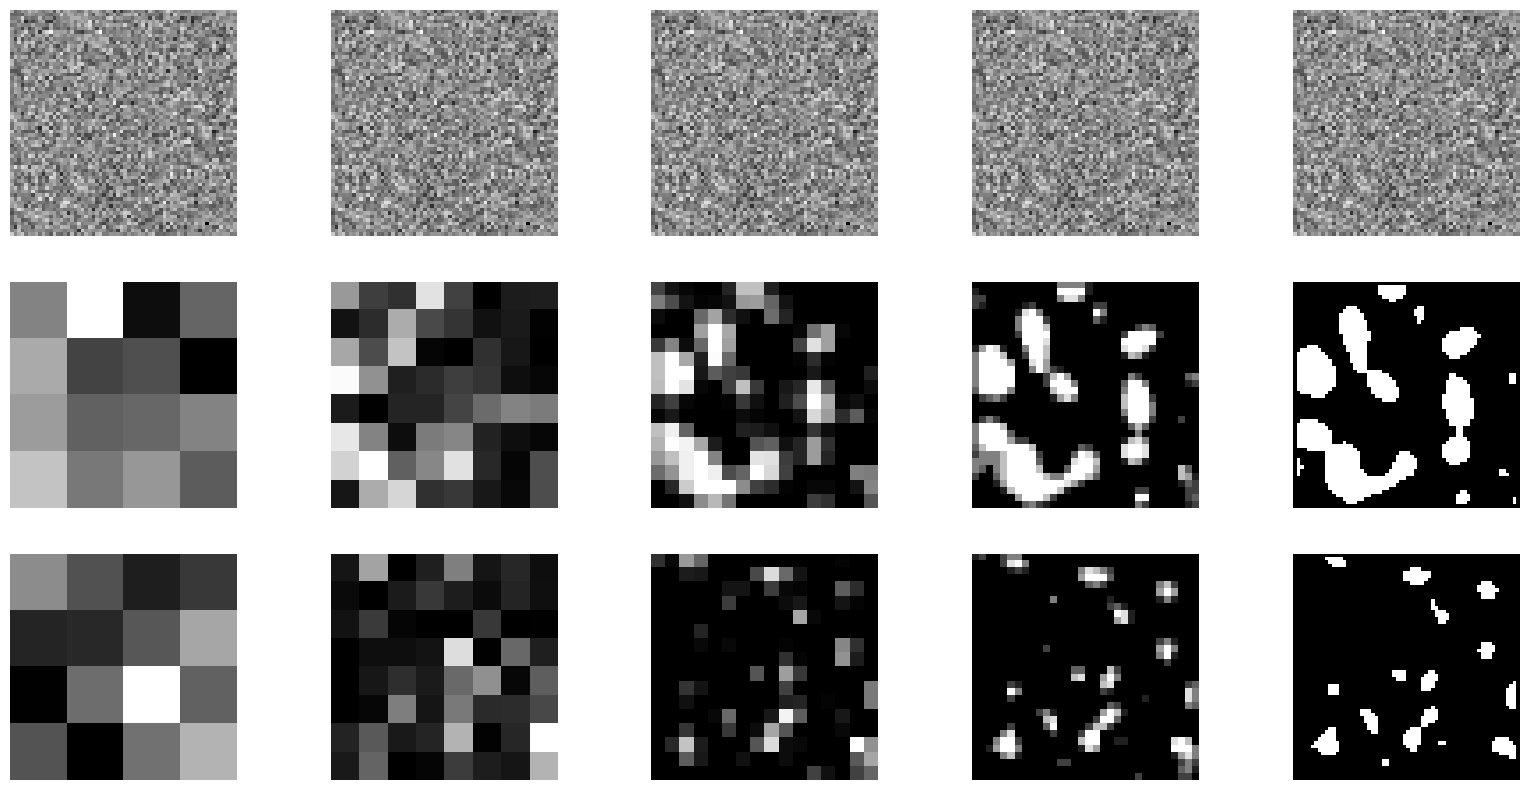

In [2]:

x = torch.randn(1, 1, 64, 64, 64)
mask = torch.tensor(generate_vessel_mask()).unsqueeze(0).unsqueeze(0)
pmask = torch.tensor(generate_vessel_mask(scale=4)).unsqueeze(0).unsqueeze(0)

masks = deep_masks(mask.float())
pmasks = deep_masks(pmask.float())

mask_plots(x, masks, pmasks)

In [25]:
import numpy as np
from scipy.ndimage import gaussian_filter, binary_closing
import noise



# Generate the vessel mask
vessel_mask = generate_vessel_mask()

# Do something with the mask, e.g., visualize or use as a filter

In [22]:
import numpy as np
from scipy.ndimage import gaussian_filter, binary_closing

def generate_vessel_mask(shape=(64, 64, 64), threshold=0.2, smoothing=2):
    # Create an array with random values
    mask = np.random.rand(*shape)

    # Apply a Gaussian filter to create smoother transitions
    mask = gaussian_filter(mask, sigma=5)

    # Threshold the smoothed random values to create a binary mask
    mask = mask > threshold

    # Apply a closing operation to connect nearby regions
    mask = binary_closing(mask, structure=np.ones((3, 3, 3)))

    return mask

# Generate the vessel mask
vessel_mask = generate_vessel_mask()

# Do something with the mask, e.g., visualize or use as a filter